In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [3]:
X_train, y_train = load_house_data()
X_features = ['Size(sqft)','Bedrooms','Floors','Age']

**Normalizing Data**

In [5]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

print(f'Peak to Peak range by column in Raw             X:{np.ptp(X_train, axis = 0)}')
print(f'Peak to Peak range by column in Normalized      X:{np.ptp(X_norm, axis = 0)}')

Peak to Peak range by column in Raw             X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized      X:[5.85 6.14 2.06 3.69]


**Regression Model**

In [7]:
sgdr = SGDRegressor(max_iter = 1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f'Number of completed Iterations:    {sgdr.n_iter_}, number of weight updates:    {sgdr.t_}')

SGDRegressor()
Number of completed Iterations:    114, number of weight updates:    11287.0


In [8]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f'Model Parameters: w = {w_norm}, b = {b_norm}')

Model Parameters: w = [109.93 -20.96 -32.34 -38.11], b = [363.18]


In [9]:
y_pred_sgd = sgdr.predict(X_norm)
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.17 485.91 389.66 492.07]
Target values 
[300.  509.8 394.  540. ]


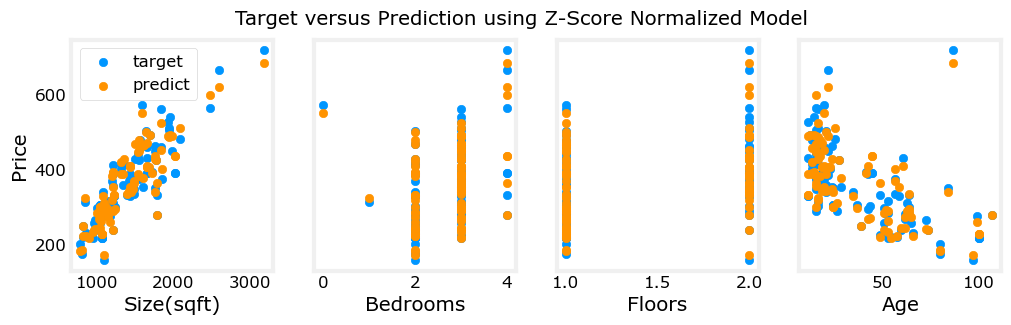

In [10]:
 fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("Target versus Prediction using Z-Score Normalized Model")
plt.show()